# Лабораторная работа 1

1) Классификация данных методом k ближайших соседей ( kNN)

3) Построение softmax-классификатора


Вариант 3: задания 1 и 3 на наборе данных CIFAR-10


Лабораторные работы можно выполнять с использованием сервиса Google Colaboratory (https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) или на локальном компьютере. 

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scripts.data_utils import load_CIFAR10


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [56]:
cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

try:
    del X_train, y_train
    del X_test, y_test
    print('Clear previously loaded data.')
except:
    pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Clear previously loaded data.
Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



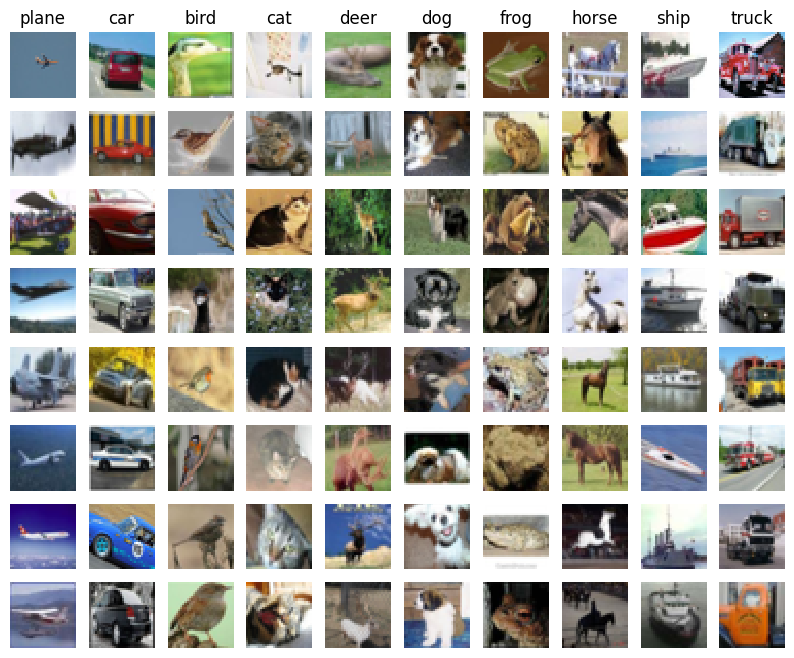

In [45]:
np.unique(y_train)
mapping_labels = ['plane', 'car', 'bird', 'cat',
                  'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
n_classes = len(mapping_labels)
n_samples = 8

for class_index, class_name in enumerate(mapping_labels):
    class_indexes = np.random.choice(np.flatnonzero(
        y_train == class_index), n_samples, replace=False)
    for i, idx in enumerate(class_indexes):
        plt_idx = i * n_classes + class_index + 1
        plt.subplot(n_samples, n_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(class_name)
plt.show()

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [57]:
percentage = 40
X_train = X_train[:X_train.shape[0]*percentage//100]
X_test = X_test[:X_test.shape[0]*percentage//100]
y_test = y_test[:y_test.shape[0]*percentage//100]
y_train = y_train[:y_train.shape[0]*percentage//100]

X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)
y_train = y_train.reshape(y_train.shape[0], -1)


1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [48]:
from scripts.classifiers import KNearestNeighbor

classifier = KNearestNeighbor()
classifier.train(X_train, y_train)

1.5 Выполните классификацию на тестовой выборке

In [49]:
distances = classifier.compute_distances_no_loops(X_test)

1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


(4000, 20000)


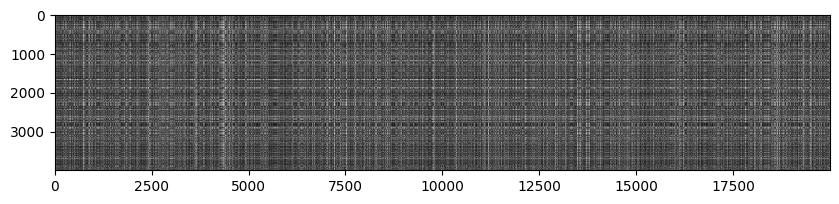

In [50]:
print(distances.shape)

plt.imshow(distances, interpolation='none')
plt.show()


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [51]:
verdicts = classifier.predict_labels(distances)

In [52]:
def accuracy(verdicts_: np.ndarray, correct_verdicts: np.ndarray) -> float:
    correct_values = 0
    for i in range(verdicts_.shape[0]):
        if verdicts_[i] == correct_verdicts[i]:
            correct_values += 1
    return correct_values / correct_verdicts.shape[0]


print(f"Accuracy: {accuracy(verdicts, y_test) * 100}%")

Accuracy: 30.5%


1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

In [53]:
multiple_verdicts = []
for k in range(1, 25):
    multiple_verdicts.append(classifier.predict_labels(distances, k))

Neighbors: 1, Accuracy: 30.5%
Neighbors: 2, Accuracy: 27.125%
Neighbors: 3, Accuracy: 29.525000000000002%
Neighbors: 4, Accuracy: 30.3%
Neighbors: 5, Accuracy: 30.55%
Neighbors: 6, Accuracy: 30.65%
Neighbors: 7, Accuracy: 30.55%
Neighbors: 8, Accuracy: 31.05%
Neighbors: 9, Accuracy: 30.975%
Neighbors: 10, Accuracy: 31.724999999999998%
Neighbors: 11, Accuracy: 31.924999999999997%
Neighbors: 12, Accuracy: 31.95%
Neighbors: 13, Accuracy: 31.674999999999997%
Neighbors: 14, Accuracy: 31.45%
Neighbors: 15, Accuracy: 31.5%
Neighbors: 16, Accuracy: 31.15%
Neighbors: 17, Accuracy: 31.075000000000003%
Neighbors: 18, Accuracy: 31.15%
Neighbors: 19, Accuracy: 31.474999999999998%
Neighbors: 20, Accuracy: 31.25%
Neighbors: 21, Accuracy: 31.324999999999996%
Neighbors: 22, Accuracy: 31.275%
Neighbors: 23, Accuracy: 31.35%
Neighbors: 24, Accuracy: 31.474999999999998%


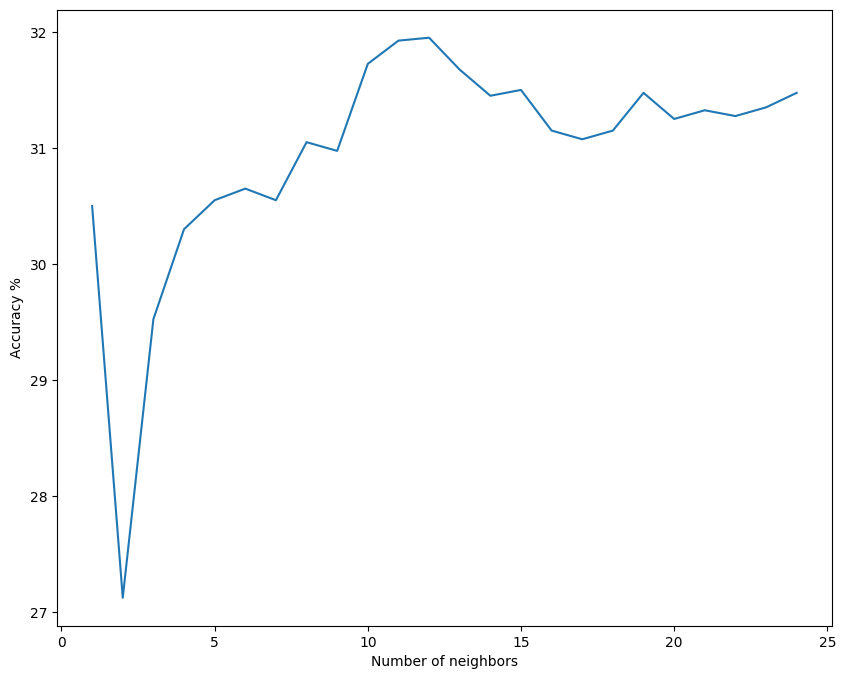

In [55]:
accuracies = []
neighbours = []
for index, verdicts in enumerate(multiple_verdicts):
    accuracies.append(accuracy(verdicts, y_test) * 100)
    neighbours.append(index + 1)
    print(f"Neighbors: {neighbours[-1]}, Accuracy: {accuracies[-1]}%")

plt.plot(neighbours, accuracies)
plt.xlabel("Number of neighbors")
plt.ylabel("Accuracy %")
plt.show()

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [15]:
def run_cross_validation(
        fold_values,
        n,
        k_values,
        X_train,
        y_train,
        show_logs=False
):
    results = {}
    for fold in fold_values:
        fold_size = n // fold
        results[fold] = []
        for k in k_values:
            accuracies = []
            for i in range(fold):
                start = i * fold_size
                end = (i + 1) * fold_size
                X_train_fold = np.concatenate((X_train[:start], X_train[end:]))
                y_train_fold = np.concatenate((y_train[:start], y_train[end:]))
                X_validation_fold = X_train[start:end]
                y_validation_fold = y_train[start:end]

                classifier.train(X_train_fold, y_train_fold)
                distances = classifier.compute_distances_no_loops(
                    X_validation_fold)
                verdicts = classifier.predict_labels(distances, k)
                accuracies.append(accuracy(verdicts, y_validation_fold))

                results[fold].append(
                    {
                        'accuracy': accuracy(verdicts, y_validation_fold),
                        'k': k
                    }
                )
            if show_logs:
                print(
                    f"Fold: {fold}, K: {k}, Accuracy: {np.mean(accuracies) * 100}%")
    return results

In [16]:
k_values = [1, 3, 5, 8, 10, 12, 15, 20, 50]
fold_values = [2, 4, 5, 6, 8, 10]
results = run_cross_validation(
    fold_values, X_train.shape[0], k_values, X_train, y_train, False)

In [18]:
def get_best_k(a):
    best_k = 0
    cumulative_values = {}
    counter = {}
    for _, values in a.items():
        for value in values:
            acc = value['accuracy']
            k = value['k']
            if k not in cumulative_values:
                cumulative_values[k] = 0
                counter[k] = 0
            counter[k] += 1
            cumulative_values[k] += acc

    for k, acc in cumulative_values.items():
        if best_k == 0 or acc > cumulative_values[best_k]:
            best_k = k
    print('Optimal k value:', best_k)
    print('Max average value:', round(
        cumulative_values[best_k] / counter[k] * 100, 2), '%')
    return best_k


optimal_k_value = get_best_k(results)

Optimal k value: 10
Max average value: 30.68 %



1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [58]:
classifier.train(X_train, y_train)

In [20]:
result_distances = classifier.compute_distances_no_loops(
    X_test
)

result_verdicts = classifier.predict_labels(
    result_distances,
    optimal_k_value
)

resulting_accuracy = accuracy(
    result_verdicts,
    y_test
)

print(f"Final accuracy: {resulting_accuracy * 100}%")

Final accuracy: 31.724999999999998%


1.11 Сделайте выводы по результатам 1 части задания.

Точность классификатора KNN зависит от количества соседей. С увеличением числа соседей растёт точность, но вместе с тем растет время обучения. Помимо этого растёт риск переобучения

## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [21]:
train_sample_percentage = 90
test_sample_percentage = 50
validation_sample_percentage = 50
dev_sample_percentage = 100

num_train = (X_train.shape[0] * train_sample_percentage) // 100
num_test = (X_test.shape[0] * test_sample_percentage) // 100
num_val = ((X_test.shape[0] - num_test) * train_sample_percentage) // 100
num_dev = ((X_test.shape[0] - num_test - num_val)
           * dev_sample_percentage) // 100

X_train = X_train[:num_train].reshape(num_train, -1).astype(np.float64)
y_train = y_train[:num_train].reshape(num_train, )

X_test, X_validation, X_dev = X_test[:num_test], X_test[num_test:num_test +
                                                        num_val], X_test[num_test+num_val:num_test+num_val+num_dev]
y_test, y_validation, y_dev = y_test[:num_test], y_test[num_test:num_test +
                                                        num_val], y_test[num_test+num_val:num_test+num_val+num_dev]

X_test = X_test.reshape(num_test, -1).astype(np.float64)
X_validation = X_validation.reshape(num_val, -1).astype(np.float64)
X_dev = X_dev.reshape(num_dev, -1).astype(np.float64)
y_test = y_test.reshape(num_test, )
y_validation = y_validation.reshape(num_val, )
y_dev = y_dev.reshape(num_dev, )

print(f"Тренировочная выборка: X={X_train.shape}, y={y_train.shape}")
print(f"Валидационная выборка: X={X_validation.shape}, y={y_validation.shape}")
print(f"Тестовая выборка: X={X_test.shape}, y={y_test.shape}")
print(f"Dev выборка: X={X_dev.shape}, y={y_dev.shape}")

Тренировочная выборка: X=(18000, 3072), y=(18000,)
Валидационная выборка: X=(1800, 3072), y=(1800,)
Тестовая выборка: X=(2000, 3072), y=(2000,)
Dev выборка: X=(200, 3072), y=(200,)


3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

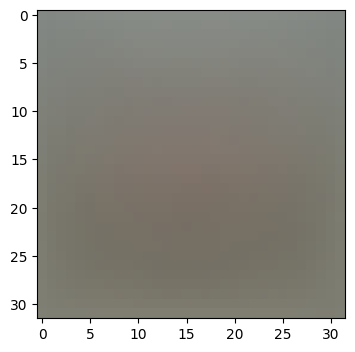

In [22]:
mean_image = np.mean(X_train, axis=0)
plt.figure(figsize=(4, 4))
plt.imshow(mean_image.reshape((32, 32, 3)).astype('uint8'))
plt.show()

In [23]:
X_train -= mean_image
X_validation -= mean_image
X_test -= mean_image

X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_validation = np.hstack([X_validation, np.ones((X_validation.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print(X_train.shape, X_validation.shape, X_test.shape, X_dev.shape)

(18000, 3073) (1800, 3073) (2000, 3073) (200, 3073)


3.4 Реализуйте функции в classifiers/softmax.py




In [24]:
from scripts.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(X_dev.shape[1], 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))

loss: 2.494244
sanity check: 2.302585


3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [25]:
from scripts.gradient_check import grad_check_sparse

loss, grad = softmax_loss_naive(W, X_dev, y_dev, 0.0)


def f(w): return softmax_loss_naive(w, X_dev, y_dev, 0.0)[0]


grad_numerical = grad_check_sparse(f, W, grad, 10)

loss, grad = softmax_loss_naive(W, X_dev, y_dev, 5e1)
def f(w): return softmax_loss_naive(w, X_dev, y_dev, 5e1)[0]


grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: -4.230701 analytic: -4.230703, relative error: 2.480863e-07
numerical: -4.267014 analytic: -4.267017, relative error: 2.971773e-07
numerical: 4.824265 analytic: 4.824261, relative error: 4.201107e-07
numerical: 8.117020 analytic: 8.117015, relative error: 2.872176e-07
numerical: -5.026822 analytic: -5.026824, relative error: 2.271643e-07
numerical: -3.053555 analytic: -3.053558, relative error: 4.652525e-07
numerical: 8.412727 analytic: 8.412723, relative error: 2.532673e-07
numerical: 5.822031 analytic: 5.822027, relative error: 3.442843e-07
numerical: -5.243639 analytic: -5.243642, relative error: 3.127986e-07
numerical: 6.698481 analytic: 6.698476, relative error: 3.333810e-07
numerical: -14.446606 analytic: -14.446607, relative error: 3.865351e-08
numerical: 1.581607 analytic: 1.581602, relative error: 1.528212e-06
numerical: -9.043585 analytic: -9.043586, relative error: 5.574629e-08
numerical: -6.271991 analytic: -6.271994, relative error: 1.831260e-07
numerical: 2.158

3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [26]:
from scripts.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(
    W, X_dev, y_dev, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.494244e+00 computed in 0.028000s
vectorized loss: 2.494244e+00 computed in 0.001000s
Loss difference: 0.000000
Gradient difference: 0.000000


3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

In [27]:
from sklearn.metrics import accuracy_score

from scripts.classifiers.linear_classifier import Softmax

softmax_classifier = Softmax()
softmax_classifier.train(X_train, y_train)
print(f"Accuracy: {accuracy_score(y_test, softmax_classifier.predict(X_test))}")

c:\Users\Zhuravel\lab_1-2\scripts\classifiers\softmax.py:92: RuntimeWarning: overflow encountered in exp
  sum_j = np.sum(np.exp(scores), axis=1).reshape((num_train, 1))
c:\Users\Zhuravel\lab_1-2\scripts\classifiers\softmax.py:99: RuntimeWarning: overflow encountered in exp
  dW = X.T.dot(np.exp(scores) / sum_j) - X.T.dot(correct_matrix)
c:\Users\Zhuravel\lab_1-2\scripts\classifiers\softmax.py:99: RuntimeWarning: invalid value encountered in divide
  dW = X.T.dot(np.exp(scores) / sum_j) - X.T.dot(correct_matrix)


Accuracy: 0.098


3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [28]:
def run_cross_validation(
    Classifier,
    X_train,
    y_train,
    X_validation,
    y_validation,
    learning_rate,
    reg
):
    classifier = Classifier()
    results = []
    classifier.train(X_train, y_train, learning_rate=learning_rate, reg=reg)
    verdicts = classifier.predict(X_validation)
    results.append(accuracy_score(verdicts, y_validation))
    return results

In [29]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

data = []
for i, learning_rate in enumerate(learning_rates):
    for regularization_strength in regularization_strengths:
        scores = run_cross_validation(
            Softmax,
            X_train,
            y_train,
            X_validation,
            y_validation,
            learning_rate,
            regularization_strength
        )
        data.append({
            "learning_rate": learning_rate,
            "regularization_strength": regularization_strength,
            "cross_val_scores": scores,
            "mean": np.mean(scores),
            "std": np.std(scores),
        })

c:\Users\Zhuravel\lab_1-2\scripts\classifiers\softmax.py:92: RuntimeWarning: overflow encountered in exp
  sum_j = np.sum(np.exp(scores), axis=1).reshape((num_train, 1))
c:\Users\Zhuravel\lab_1-2\scripts\classifiers\softmax.py:99: RuntimeWarning: overflow encountered in exp
  dW = X.T.dot(np.exp(scores) / sum_j) - X.T.dot(correct_matrix)
c:\Users\Zhuravel\lab_1-2\scripts\classifiers\softmax.py:99: RuntimeWarning: invalid value encountered in divide
  dW = X.T.dot(np.exp(scores) / sum_j) - X.T.dot(correct_matrix)


In [30]:
import pandas as pd
softmax_cross_val_scores_df = pd.DataFrame(data=data)
softmax_cross_val_scores_df.sort_values(by="mean").sort_values(by="std", ascending=False)

,learning_rate,regularization_strength,cross_val_scores,mean,std
2,5.000000e-05,25000.0,[0.07111111111111111],0.071111,0.0
3,5.000000e-05,50000.0,[0.09944444444444445],0.099444,0.0
0,1.000000e-07,25000.0,[0.13444444444444445],0.134444,0.0
1,1.000000e-07,50000.0,[0.1388888888888889],0.138889,0.0


In [38]:
best_softmax_classifier = Softmax()
best_softmax_classifier.train(X_train, y_train, learning_rate=5e-5, reg=2.5e4)
print(f"accuracy: {accuracy_score(y_test, best_softmax_classifier.predict(X_test))}")

accuracy: 0.1405


3.10 Сделайте выводы по третьей части задания

На наборе данных CIFAR-10 классификатор kNN показывает себя точнее Softmax.